<a href="https://colab.research.google.com/github/Gavriel55555/data-mining/blob/main/data_mining_2_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will use pytorch and sklearn to classify the data .
We will use trees and forest trees from sklearn and we will try to build an ANN from pytorch and we will comper it to ANN from sklearn.


This project presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

In [66]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet_raw_and_data_sinthetic.csv']))

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic (1).csv


In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **Cleaning the data**

In this section we will clear the raw data in order to use it later for visiulision and as an input for training of the AI models.

Firstly we will drop all rows that contain one or more Nan values:

In [67]:
df = df.dropna()

Now lets see if we have duplictate rows in our data set:

In [68]:
df[df.duplicated()].shape[0]

24

We have 24 duplicated rows, so lets get rid of them.

In [4]:
df = df.drop_duplicates()

Now after we left with non duplicated and not Nan values lets see what values we have in the "NObeyesdad" coulmn:

In [69]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# **Visualising The Data**

Let's see how much of each NObeyesdad level there is in the data



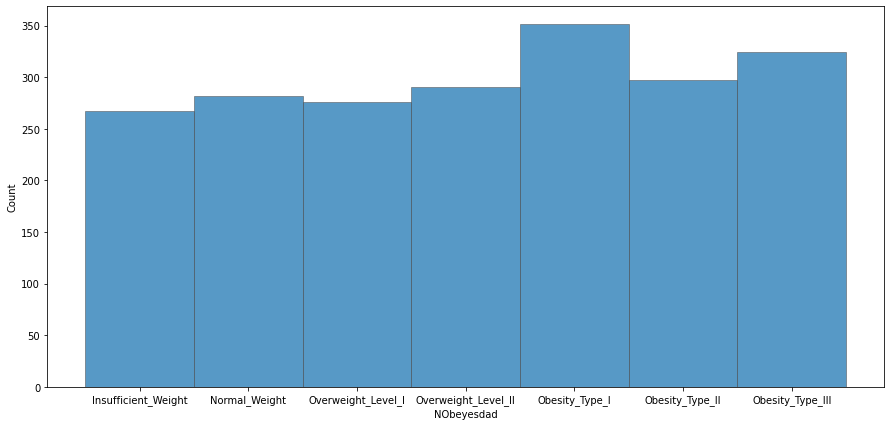

In [ ]:
import seaborn as sns
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], ['Insufficient_Weight','Normal_Weight',"Overweight_Level_I","Overweight_Level_II",'Obesity_Type_I',
                                                     "Obesity_Type_II","Obesity_Type_III"])
plt.figure(figsize=(15,7))
sns.histplot( df, x="NObeyesdad", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )



Text(0.5, 1.0, 'NObeyesdad level - male and female')

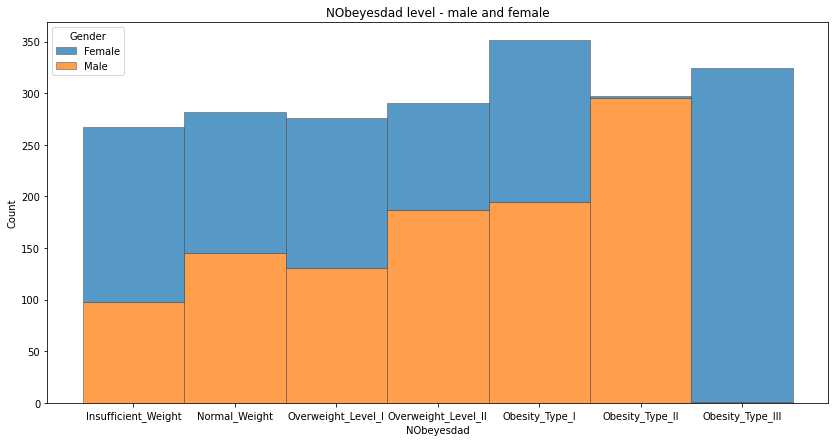

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.histplot( df, x="NObeyesdad", hue="Gender", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

plt.title(r'NObeyesdad level - male and female')

As you can see only from the graph only women suffer from obesity_type_III and apart from the obesity_type_II where the absolute majority are men, most of the data is evenly distributed

Now let's see the obesity according to Transportation used

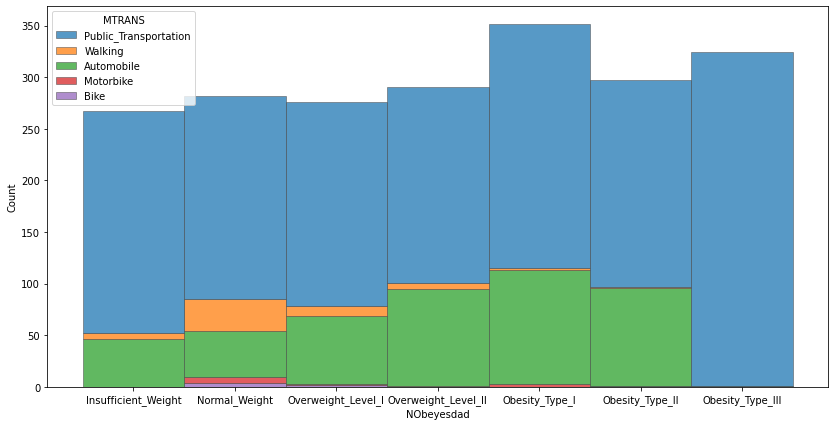

In [ ]:
plt.figure(figsize=(14,7))

sns.histplot( df, x="NObeyesdad", hue="MTRANS", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

#plt.title(r'NObeyesdad level -Transportation used ')

As you can see most of the people how use bike or motorbike or walking (do sports) dont suffer from obesity or overweight

Now lets see if there is a correlation between overweight and family history with overweight

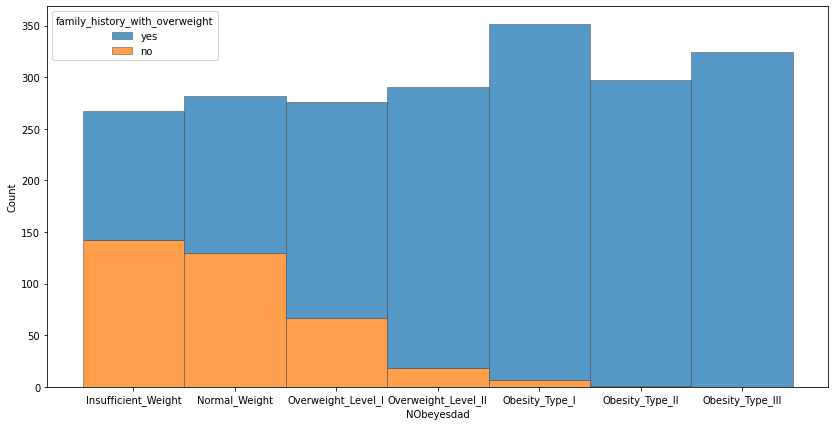

In [ ]:
plt.figure(figsize=(14,7))

sns.histplot( df, x="NObeyesdad", hue="family_history_with_overweight", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

#plt.title(r'NObeyesdad level -family_history_with_overweight ')

we can see that only people with family history of overweight suffer from 
obesity II and obesity III and little people with no history suufer from overweight.

we know that BMI is calculated by weight and height.
So lets see if there is a correlation between Nobeyesdad,height and weight

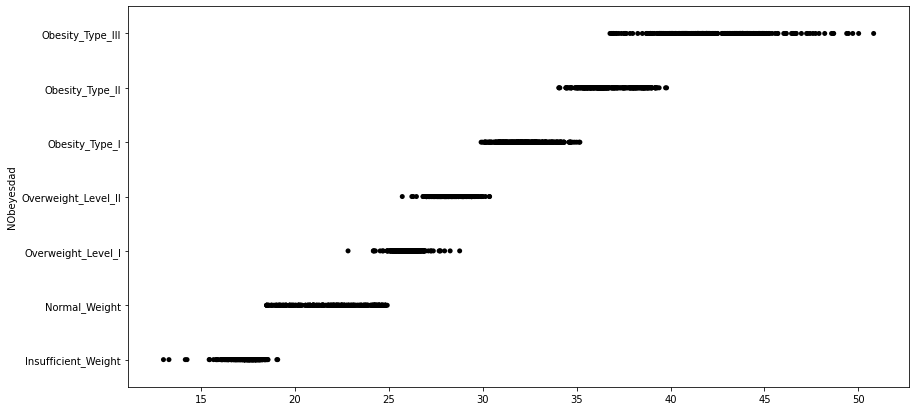

In [ ]:
import math 
heights=list(df['Height'])
weights=list(df['Weight'])
bmi=list()
heights_pow=[]
for i in range(0,len(heights)):
  heights_pow.append(heights[i]*heights[i])
for i in range(0,len(heights)):
  bmi.append(weights[i]/heights_pow[i])
order = [ "Obesity_Type_III", "Obesity_Type_II", "Obesity_Type_I", "Overweight_Level_II","Overweight_Level_I","Normal_Weight","Insufficient_Weight"]
plt.figure(figsize=(14,7))
sns.stripplot(x=bmi, y=df['NObeyesdad'], 
             order = order,
             color = 'black', jitter=False)

So we can see that there is a correlation between Nobeyesdad,height and weight, and for most of the cases we can know the level of NObeyesdad by the Height and Weight.

Now lets see the correlation in 3d

Text(0.5, 0.92, 'Correlation between home size, number of rooms and pirce.')

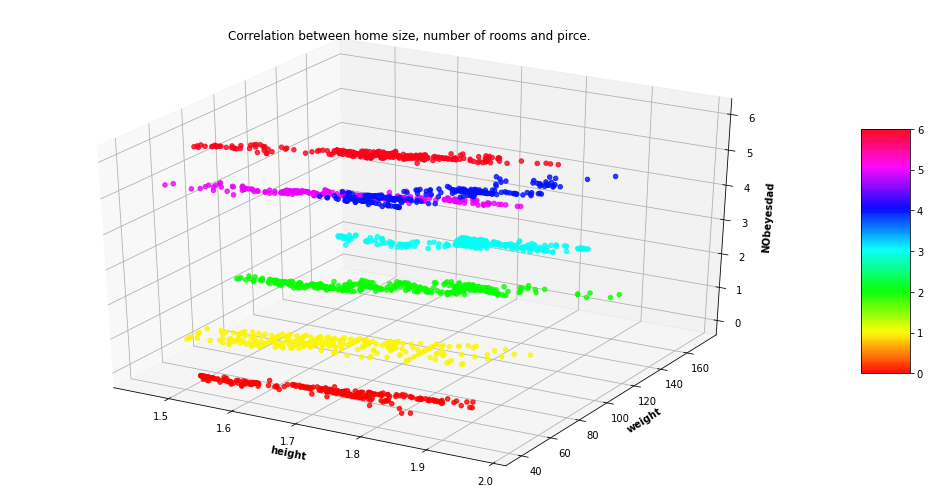

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (18, 9))
ax = plt.axes(projection ="3d")
df1=df
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df1['NObeyesdad'][0:200])
df1['NObeyesdad']= encoder.transform(df['NObeyesdad'])
df1['NObeyesdad']
my_cmap = plt.get_cmap('hsv')
x = df['Height']
y = df['Weight']
z = df1['NObeyesdad']
sctt = ax.scatter3D(x, y, z, cmap = my_cmap, c = z ,alpha = 0.8 )


ax.set_xlabel('height', fontweight ='bold')
ax.set_ylabel('weight', fontweight ='bold')
ax.set_zlabel('NObeyesdad', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between home size, number of rooms and pirce.')

### **Now lets see the correlation matrix**

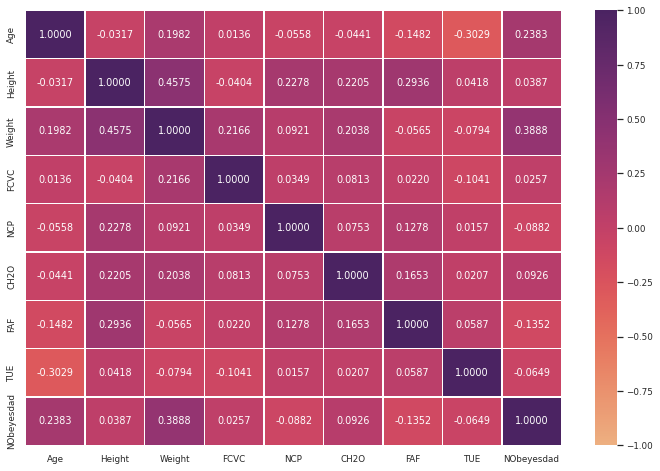

In [ ]:

sns.set(font_scale=0.8)
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("flare", as_cmap=True))


plt.show()

As you can see the highest correlation between height and weight.that because we know that the taller you are the more you weight.
and also the BMI is calculated by weight and height so its a hint

Text(0.5, 1.0, 'Affect of elevator on aparments and penthouse prices')

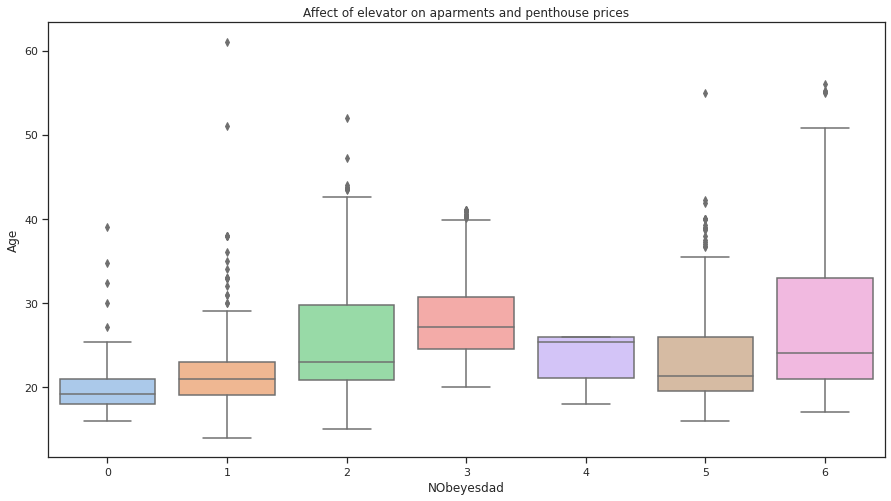

In [ ]:
# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="NObeyesdad", y="Age", data=df)
plt.title('Affect of elevator on aparments and penthouse prices')

Lets explain how does box plot works: the line in the middle of the rectangle stands for the median velue, the upper edge of the rect stands for 75% and the lower edge stands for the 25'st precentile. the upper bound stands for 2 standard devations from the mean ( 97.8% ) and the lower bound is for 2 standard devations down from the mean (2.2%) all the rest of the dots are outliers.

by this we cant see a clear correlation between the Age and the NObeyesdad but we can see that the median value is not high whice means that a lot of young suffer from overweight and obesity.

# **Building model for predicting NObeyesdad**

For the purpose of training we will convert all the non numeric values to numerical values.

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['MTRANS'][0:200])
df['MTRANS']= encoder.transform(df['MTRANS'])
df['MTRANS']

0       3
1       3
2       3
3       4
4       3
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: MTRANS, Length: 2111, dtype: int64

In [74]:
encoder = LabelEncoder()
encoder.fit(df['CALC'][0:200])
df['CALC']=encoder.transform(df['CALC'])

encoder = LabelEncoder()
encoder.fit(df['SCC'][0:200])
df['SCC']=encoder.transform(df['SCC'])

encoder = LabelEncoder()
encoder.fit(df['SMOKE'][0:200])
df['SMOKE']=encoder.transform(df['SMOKE'])

encoder = LabelEncoder()
encoder.fit(df['CAEC'][0:200])
df['CAEC']=encoder.transform(df['CAEC'])

encoder = LabelEncoder()
encoder.fit(df['FAVC'][0:200])
df['FAVC']=encoder.transform(df['FAVC'])

encoder = LabelEncoder()
encoder.fit(df['family_history_with_overweight'][0:200])
df['family_history_with_overweight']=encoder.transform(df['family_history_with_overweight'])

encoder = LabelEncoder()
encoder.fit(df['Gender'][0:200])
df['Gender']=encoder.transform(df['Gender'])

Splitting the data to train, test


In [8]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["NObeyesdad"]]
x=df.loc[:,var_columns]
y = df.loc[:,'NObeyesdad']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (2087, 17)
(1669, 16)
(1669,)
(418, 16)
(418,)


In [9]:
print(y_valid)

1337         Obesity_Type_I
1763        Obesity_Type_II
389      Overweight_Level_I
595     Insufficient_Weight
1735        Obesity_Type_II
               ...         
1694        Obesity_Type_II
1583        Obesity_Type_II
1743        Obesity_Type_II
1700        Obesity_Type_II
351           Normal_Weight
Name: NObeyesdad, Length: 418, dtype: object


# **DecisionTree**

from sklearn import DecisionTreeClassifier Our first model will be a DecisionTreeClassifier ( x_train are the indepndent variables and y_valid is the target variable)

In [10]:
model_tree = DecisionTreeClassifier(max_depth=10, class_weight='balanced',ccp_alpha=0.01) #ccp_alpah is the

print(model_tree.fit(x_train, y_train))
pre=model_tree.predict(x_valid)
print(model_tree.get_params())

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=10)
{'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [11]:
pre=model_tree.predict(x_valid)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print(accuracy_score(y_valid,pre))

0.8564593301435407


What does the output 0.85 means?

the output of the score method tell us how much of the variance in the target variable can be explained by the indepndent variables in the specific model ( as the number goes higher the model is considerd to be more accurate ).

know lets see whice feature impect the most

In [13]:
feature_names=x.columns
feature_importance=pd.DataFrame(model_tree.feature_importances_,index=feature_names)
print(feature_importance)

                                       0
Gender                          0.197611
Age                             0.000000
Height                          0.218480
Weight                          0.557231
family_history_with_overweight  0.000000
FAVC                            0.026679
FCVC                            0.000000
NCP                             0.000000
CAEC                            0.000000
SMOKE                           0.000000
CH2O                            0.000000
SCC                             0.000000
FAF                             0.000000
TUE                             0.000000
CALC                            0.000000
MTRANS                          0.000000


As expected the weight and height have the highest effect (BMI)

tree show

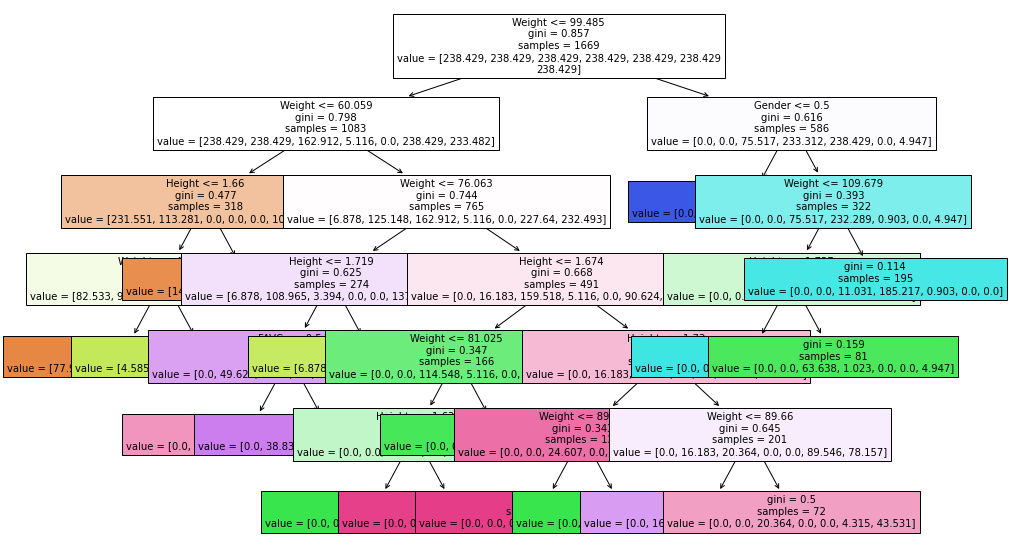

In [14]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_names=x.columns
fig=plt.figure(figsize=(15,10))
_=tree.plot_tree(model_tree,feature_names=feature_names,filled=True,fontsize=10)

# **RandomForestClassifier**

Random forest is sometimes better and get good result. lets try:

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10,class_weight='balanced',ccp_alpha=0.01)
print(clf.fit(x_train, y_train))
pre2=clf.predict(x_valid)
print(accuracy_score(y_valid,pre2))

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=10)
0.8660287081339713


As expected we get better result for the forest tree .

# **Artificial Neural Network**

first lets try to implement a ANN from pytorch

run it on the cpu

In [75]:
device=torch.device('cude' if torch.cuda.is_available() else 'cpu')

In [76]:
encoder = LabelEncoder()
encoder.fit(df['NObeyesdad'][0:300])
df['NObeyesdad']=encoder.transform(df['NObeyesdad'])

In [77]:
from sklearn.preprocessing import StandardScaler
features = df.drop(['NObeyesdad'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

first we will change the y_train and y_valid so it will be a vector

In [91]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["NObeyesdad"]]
x=df.loc[:,var_columns]
y = df.loc[:,'NObeyesdad']
x_train, x_valid, y_train, y_valid = train_test_split(features_norm, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

Shape of all dataset: (2111, 17)
(1688, 16)
(1688,)
(423, 16)
(423,)


then we will change all to tensor

In [92]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid.values, dtype=torch.float)

Build the model

In [127]:
class classifier_MODEL(nn.Module):
    def __init__(self):
        super(classifier_MODEL, self).__init__()
        self.layer1 = nn.Linear(16, 28) 
        self.layer2 = nn.Linear(28, 14)
        self.layer3 = nn.Linear(14, 7)
        self.layer4= nn.ReLU()
    def forward(self, x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        return x

In [128]:
model=classifier_MODEL().to(device)
criterion =nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

the CrossEntropyLoss requers the y_train to be type long

In [129]:
y_train = torch.tensor(y_train,dtype=torch.long)

<ipython-input-129-6d63635beb05>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.long)


Now lets train the model

In [131]:
for epoch in range(1000):
    #forward pass:
    output=model(x_train)
    loss=criterion(output,y_train)
    #backward pass:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # make the updates for each parameter
    if(epoch+1)%50==0:
      print(f'epoch:{epoch+1}: loss={loss:.8f}')

epoch:50: loss=0.04237158
epoch:100: loss=0.04226048
epoch:150: loss=0.04215819
epoch:200: loss=0.04264612
epoch:250: loss=0.04198560
epoch:300: loss=0.04190223
epoch:350: loss=0.04182801
epoch:400: loss=0.04185625
epoch:450: loss=0.04170296
epoch:500: loss=0.04164155
epoch:550: loss=0.04158774
epoch:600: loss=0.04154825
epoch:650: loss=0.04149332
epoch:700: loss=0.04144904
epoch:750: loss=0.04152197
epoch:800: loss=0.04137846
epoch:850: loss=0.04133851
epoch:900: loss=0.04130539
epoch:950: loss=0.04133897
epoch:1000: loss=0.04124826


In [132]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    #for i,x in enumerate(x_valid):
    outputs = model(x_valid)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += y_valid.size(0)
    n_correct += (predicted == (y_valid)).sum().item()
acc= 100.0 * n_correct / n_samples
print(f'accuracy={acc}')

accuracy=98.10874704491725


# now lets use the bulid in func for ANN from sklearn to compre the results

first to use MEAN_SQUARED_ERROR lets change the target to numrtic/ 

In [ ]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df if c not in ["NObeyesdad"]]
x=df.loc[:,var_columns]
y = df.loc[:,'NObeyesdad']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

Shape of all dataset: (2087, 17)


In [ ]:
mse=[]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
clf = MLPClassifier(random_state=1,activation='relu',batch_size=100, max_iter=550,learning_rate='adaptive',hidden_layer_sizes=[100],verbose=False)
clf.fit(x_train, y_train)
pre3=clf.predict(x_train)
print(accuracy_score(y_train,pre3))

0.9215098861593769


In [ ]:
mse.append(mean_squared_error(y_train,pre3))

In [ ]:
print(mse)

[1.6644697423606951, 1.3265428400239665, 1.0683043738765727, 0.8406231276213302, 0.7609346914319952, 0.7609346914319952, 0.7609346914319952]


Text(0, 0.5, 'errors')

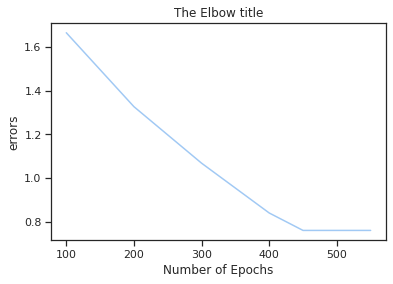

In [ ]:
Epochs=[100,200,300,400,450,500,550]

plt.plot(Epochs,mse)
plt.title('The Elbow title')
plt.xlabel('Number of Epochs')
plt.ylabel('errors')

As we can see num of epochs affects up to a certain level and the best result is from 450 epochs.

# **classification_report for test data**

now lets see on the test data

the epochs set to 450 because its the best result for the trinning on the train data

In [ ]:
pre3=clf.predict(x_valid)
print(accuracy_score(y_valid,pre3))

0.861244019138756


lets see the result as the num of epochs

In [ ]:
mse_result=[]

In [ ]:
mse_result.append(mean_squared_error(y_valid,pre3))

Text(0, 0.5, 'errors')

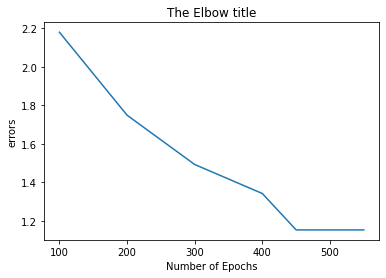

In [ ]:
Epochs=[100,200,300,400,450,500,550]

plt.plot(Epochs,mse_result)
plt.title('The Elbow title')
plt.xlabel('Number of Epochs')
plt.ylabel('errors')

# **Summary**

To sum things up We have achived good level of prediction with our best model ( 87% of the variance can be explained), but as we can see from the result of the ANN we bulid we get 98%, whice is great result.
Also in this data set 2 colums add big inpect because of the BMI but it didnt bader us.